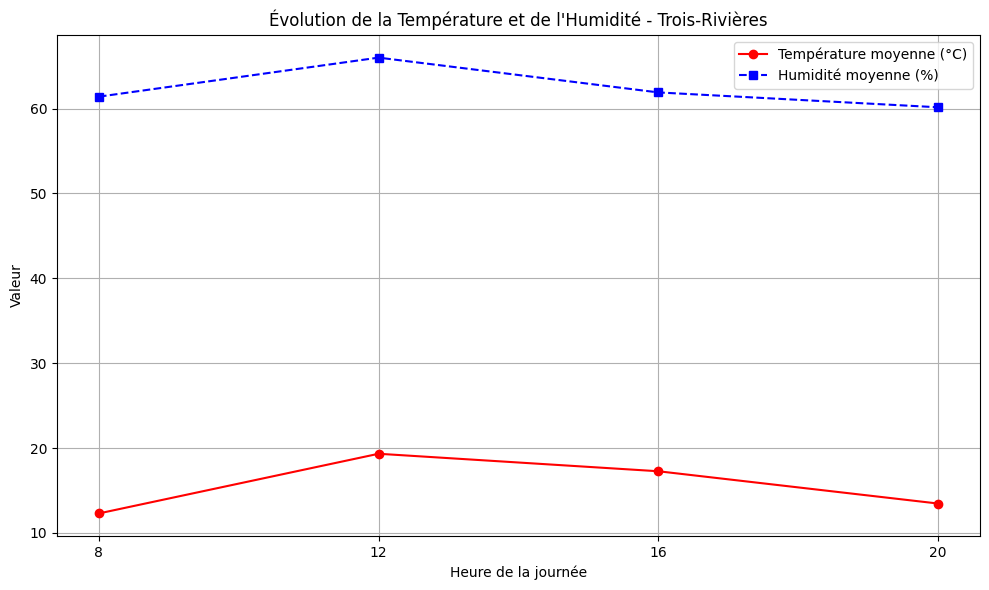

In [11]:
# 🚀 Projet : Simulation de Cartographie Interactive - Trois-Rivières

# 1. Importation des librairies
import pandas as pd
import folium
import random
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster

# 2. Paramètres de base
base_lat, base_lon = 46.35, -72.55

def random_shift():
    return random.uniform(-0.01, 0.01)

# 3. Générer les coordonnées de 20 capteurs
def generate_base_data():
    data = []
    for _ in range(20):
        latitude = base_lat + random_shift()
        longitude = base_lon + random_shift()
        data.append([latitude, longitude])
    return pd.DataFrame(data, columns=["Latitude", "Longitude"])

capteurs = generate_base_data()

# 4. Générer les mesures environnementales pour différentes heures
def generate_readings(hour):
    temperature_shift = {8: -2, 12: +5, 16: +3, 20: -1}
    readings = []
    for _ in range(20):
        temp_base = random.uniform(10, 20)
        temp = temp_base + temperature_shift.get(hour, 0)
        humidity = random.randint(40, 85)
        air_quality = random.choices(['Bonne', 'Modérée', 'Mauvaise'], weights=[5, 3, 2])[0]
        readings.append([temp, air_quality, humidity])
    return pd.DataFrame(readings, columns=["Température (°C)", "Qualité de l'air", "Humidité (%)"])

# 5. Création des scénarios par heure
heures = [8, 12, 16, 20]
scenarios = {}

temp_moyennes = []
humidity_moyennes = []

for h in heures:
    df = capteurs.copy()
    readings = generate_readings(h)
    df = pd.concat([df, readings], axis=1)
    scenarios[h] = df
    temp_moyennes.append(df["Température (°C)"].mean())
    humidity_moyennes.append(df["Humidité (%)"].mean())

# 6. Création du graphique combiné Température + Humidité
plt.figure(figsize=(10, 6))
plt.plot(heures, temp_moyennes, marker='o', linestyle='-', color='red', label="Température moyenne (°C)")
plt.plot(heures, humidity_moyennes, marker='s', linestyle='--', color='blue', label="Humidité moyenne (%)")
plt.title("Évolution de la Température et de l'Humidité - Trois-Rivières")
plt.xlabel("Heure de la journée")
plt.ylabel("Valeur")
plt.xticks(heures)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📍 Création de la carte Folium (OpenStreetMap par défaut)
map_tr = folium.Map(location=[46.35, -72.55], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map_tr)

# Ajout des capteurs
for idx, row in scenarios[12].iterrows():
    popup_info = "<b>Température :</b> {:.1f}°C<br>".format(row['Température (°C)'])
    popup_info += "<b>Humidité :</b> {}%<br>".format(row['Humidité (%)'])
    popup_info += "<b>Qualité de l'air :</b> {}".format(row["Qualité de l'air"])

    color = 'green' if row["Qualité de l'air"] == 'Bonne' else 'orange' if row["Qualité de l'air"] == 'Modérée' else 'red'

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_info,
        icon=folium.Icon(color=color, icon="cloud", prefix="fa")
    ).add_to(marker_cluster)

# Afficher la carte
map_tr

